# Support Vector Machine

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Linear SVM

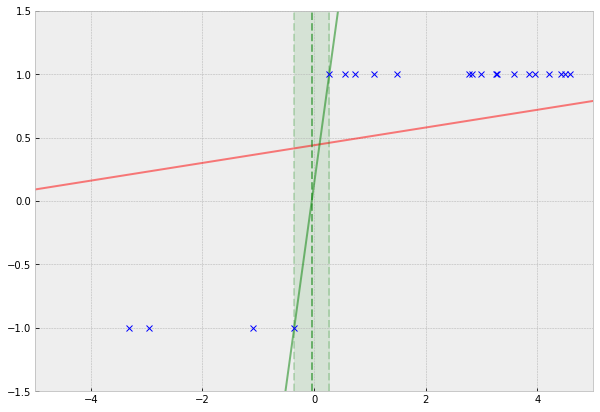

In [2]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(test_X, regr.predict(test_X), alpha=0.5, c='r')
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--', alpha=0.2)


# linear svm
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X,y)
plt.ylim(-1.5, 1.5)
plt.xlim(-5, 5)

# svm 的判斷分割點
x0 = -clf.intercept_[0]/clf.coef_[0,0]
x1 = (1-clf.intercept_[0])/clf.coef_[0,0]
x2 = (-1-clf.intercept_[0])/clf.coef_[0,0]
# or 
#assert (clf.n_support_ == [1,1]).all()
#x1, x2 = clf.support_vectors_.ravel()
plt.plot(test_X, clf.coef_[0]*test_X+clf.intercept_, 'g', alpha=0.5);
plt.plot([x0]*2, [-1.5,1.5], 'g--', alpha=0.5)
for x in [x1, x2]:
    plt.plot([x]*2, [-1.5,1.5], 'g--', alpha=0.2);
plt.fill_betweenx([-1.5,1.5], [x1]*2, [x2]*2,alpha=0.1, zorder=-1, color="g")

plt.plot(X, y, 'bx');

簡易的 svm 實驗

使用 Iris dataset https://zh.wikipedia.org/wiki/安德森鸢尾花卉数据集

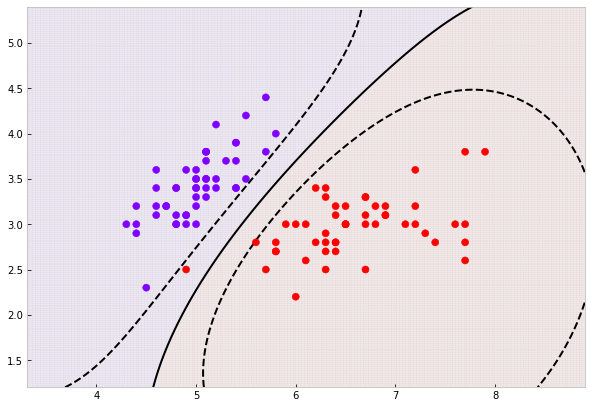

In [3]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# 只取 y=0,2 以及 X 的前兩個 features
X = X[y!=1, :2]
y = y[y!=1]
clf=svm.SVC(kernel='rbf')
clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# 畫出顏色和邊界
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.02)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* 不同的設定
* 不同的圖
* 參考 http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

## MNIST

In [4]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
train_X = pca.fit_transform(train_set[0])
test_X = pca.transform(test_set[0])

# use only first 10000 samples
idx = np.random.choice(np.arange(train_X.shape[0]), 30000, replace=False)
train_X = train_X[idx]
train_y = train_y[idx]

In [5]:
clf = svm.SVC(decision_function_shape='ovo')

In [6]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

10.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(train_X) == train_y))

0.9906
15.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(test_X) == test_y))

0.9796
5.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q
* 不同的 PCA 設定？
* 不用 PCA
* extreme learning machine?